<a href="https://colab.research.google.com/github/zeynepylmaz/PythonDataScienceHandbook/blob/master/UP_DA_2_HARD_SKILLS_TASK_26.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#UP/DA-2 HARD SKILLS TASK-26

##Task-A

TASK-26A: Please provide different analysis for the presented dataset in the first 4 videos via the link below to provide deeper insights. Please also provide your written comments. 

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns                       
import matplotlib.pyplot as plt             
%matplotlib inline     
sns.set(color_codes=True)

In [ ]:
df = pd.read_csv("data.csv")
df.head(5) 

Make       Model  Year  ... city mpg  Popularity   MSRP
0  BMW  1 Series M  2011  ...       19        3916  46135
1  BMW    1 Series  2011  ...       19        3916  40650
2  BMW    1 Series  2011  ...       20        3916  36350
3  BMW    1 Series  2011  ...       18        3916  29450
4  BMW    1 Series  2011  ...       18        3916  34500

[5 rows x 16 columns]

In [ ]:
df.tail(5) 

Make   Model  Year  ... city mpg  Popularity   MSRP
11909    Acura     ZDX  2012  ...       16         204  46120
11910    Acura     ZDX  2012  ...       16         204  56670
11911    Acura     ZDX  2012  ...       16         204  50620
11912    Acura     ZDX  2013  ...       16         204  50920
11913  Lincoln  Zephyr  2006  ...       17          61  28995

[5 rows x 16 columns]

In [ ]:
df.dtypes

Make                  object
Model                 object
Year                   int64
Engine Fuel Type      object
Engine HP            float64
Engine Cylinders     float64
Transmission Type     object
Driven_Wheels         object
Number of Doors      float64
Market Category       object
Vehicle Size          object
Vehicle Style         object
highway MPG            int64
city mpg               int64
Popularity             int64
MSRP                   int64
dtype: object

In [ ]:
df = df.drop(['Engine Fuel Type', 'Market Category', 'Vehicle Style', 'Number of Doors', 'Vehicle Size'], axis=1)
df.head(5)

Make       Model  Year  Engine HP  ...  highway MPG city mpg Popularity   MSRP
0  BMW  1 Series M  2011      335.0  ...           26       19       3916  46135
1  BMW    1 Series  2011      300.0  ...           28       19       3916  40650
2  BMW    1 Series  2011      300.0  ...           28       20       3916  36350
3  BMW    1 Series  2011      230.0  ...           28       18       3916  29450
4  BMW    1 Series  2011      230.0  ...           28       18       3916  34500

[5 rows x 11 columns]

In [ ]:
df = df.rename(columns={"Engine HP": "HP", "Engine Cylinders": "Cylinders", "Transmission Type": "Transmission", "Driven_Wheels": "Drive Mode","highway MPG": "MPG-H", "city mpg": "MPG-C", "MSRP": "Price" })
df.head(5)

Make       Model  Year     HP  ...  MPG-H MPG-C Popularity  Price
0  BMW  1 Series M  2011  335.0  ...     26    19       3916  46135
1  BMW    1 Series  2011  300.0  ...     28    19       3916  40650
2  BMW    1 Series  2011  300.0  ...     28    20       3916  36350
3  BMW    1 Series  2011  230.0  ...     28    18       3916  29450
4  BMW    1 Series  2011  230.0  ...     28    18       3916  34500

[5 rows x 11 columns]

In [ ]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (989, 11)


In [ ]:
df = df.drop_duplicates()
df.head(5)

Make       Model  Year     HP  ...  MPG-H MPG-C Popularity  Price
0  BMW  1 Series M  2011  335.0  ...     26    19       3916  46135
1  BMW    1 Series  2011  300.0  ...     28    19       3916  40650
2  BMW    1 Series  2011  300.0  ...     28    20       3916  36350
3  BMW    1 Series  2011  230.0  ...     28    18       3916  29450
4  BMW    1 Series  2011  230.0  ...     28    18       3916  34500

[5 rows x 11 columns]

In [ ]:
print(df.isnull().sum())

Make             0
Model            0
Year             0
HP              69
Cylinders       30
Transmission     0
Drive Mode       0
MPG-H            0
MPG-C            0
Popularity       0
Price            0
dtype: int64


In [ ]:
df = df.dropna()   

In [ ]:
print(df.isnull().sum()) 

Make            0
Model           0
Year            0
HP              0
Cylinders       0
Transmission    0
Drive Mode      0
MPG-H           0
MPG-C           0
Popularity      0
Price           0
dtype: int64


In [ ]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Year              9.0
HP              130.0
Cylinders         2.0
MPG-H             8.0
MPG-C             6.0
Popularity     1460.0
Price         21327.5
dtype: float64


In [ ]:
df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df.shape

(8438, 11)

In [ ]:
df.head(5)

Make       Model  Year     HP  ...  MPG-H MPG-C Popularity  Price
0  BMW  1 Series M  2011  335.0  ...     26    19       3916  46135
1  BMW    1 Series  2011  300.0  ...     28    19       3916  40650
2  BMW    1 Series  2011  300.0  ...     28    20       3916  36350
3  BMW    1 Series  2011  230.0  ...     28    18       3916  29450
4  BMW    1 Series  2011  230.0  ...     28    18       3916  34500

[5 rows x 11 columns]

In [ ]:
pd.unique(df['Drive Mode'])

array(['rear wheel drive', 'front wheel drive', 'all wheel drive',
       'four wheel drive'], dtype=object)

In [ ]:
pd.unique(df['Transmission'])

array(['MANUAL', 'AUTOMATIC', 'AUTOMATED_MANUAL', 'UNKNOWN'], dtype=object)

In [ ]:
pd.unique(df['Cylinders'])

array([6., 4., 8., 5., 3.])

In [ ]:
pd.unique(df['MPG-H'])

array([26, 28, 27, 25, 21, 22, 35, 34, 31, 30, 32, 33, 36, 29, 40, 23, 24,
       37, 39, 41, 38, 19, 20, 16, 17, 18, 15, 42, 14, 13])

In [ ]:
pd.unique(df['MPG-C'])

array([19, 20, 18, 17, 16, 26, 23, 22, 21, 24, 25, 29, 28, 30, 27, 15, 31,
       14, 13, 12, 11, 10])

Here I have defined the data set with the 'describe' function in order to be able to observe it with its general lines. And the minimum, maximum and average values of all columns, etc. i have observed.

In [ ]:
df.describe().T

count          mean           std  ...      50%       75%      max
Year        8438.0   2011.393458      6.195309  ...   2015.0   2016.00   2017.0
HP          8438.0    235.545508     76.887917  ...    230.0    290.00    485.0
Cylinders   8438.0      5.382555      1.377924  ...      6.0      6.00      8.0
MPG-H       8438.0     26.728490      5.648645  ...     26.0     31.00     42.0
MPG-C       8438.0     19.465395      4.336031  ...     19.0     22.00     31.0
Popularity  8438.0   1209.432211    866.215405  ...   1013.0   1851.00   3916.0
Price       8438.0  31188.020265  15026.125060  ...  29995.0  40098.75  75200.0

[7 rows x 8 columns]

Then I used the pairplot method, which was the first visualization I did. Thanks to this, I was able to draw bidirectional relationships for numeric columns throughout the entire data frame.

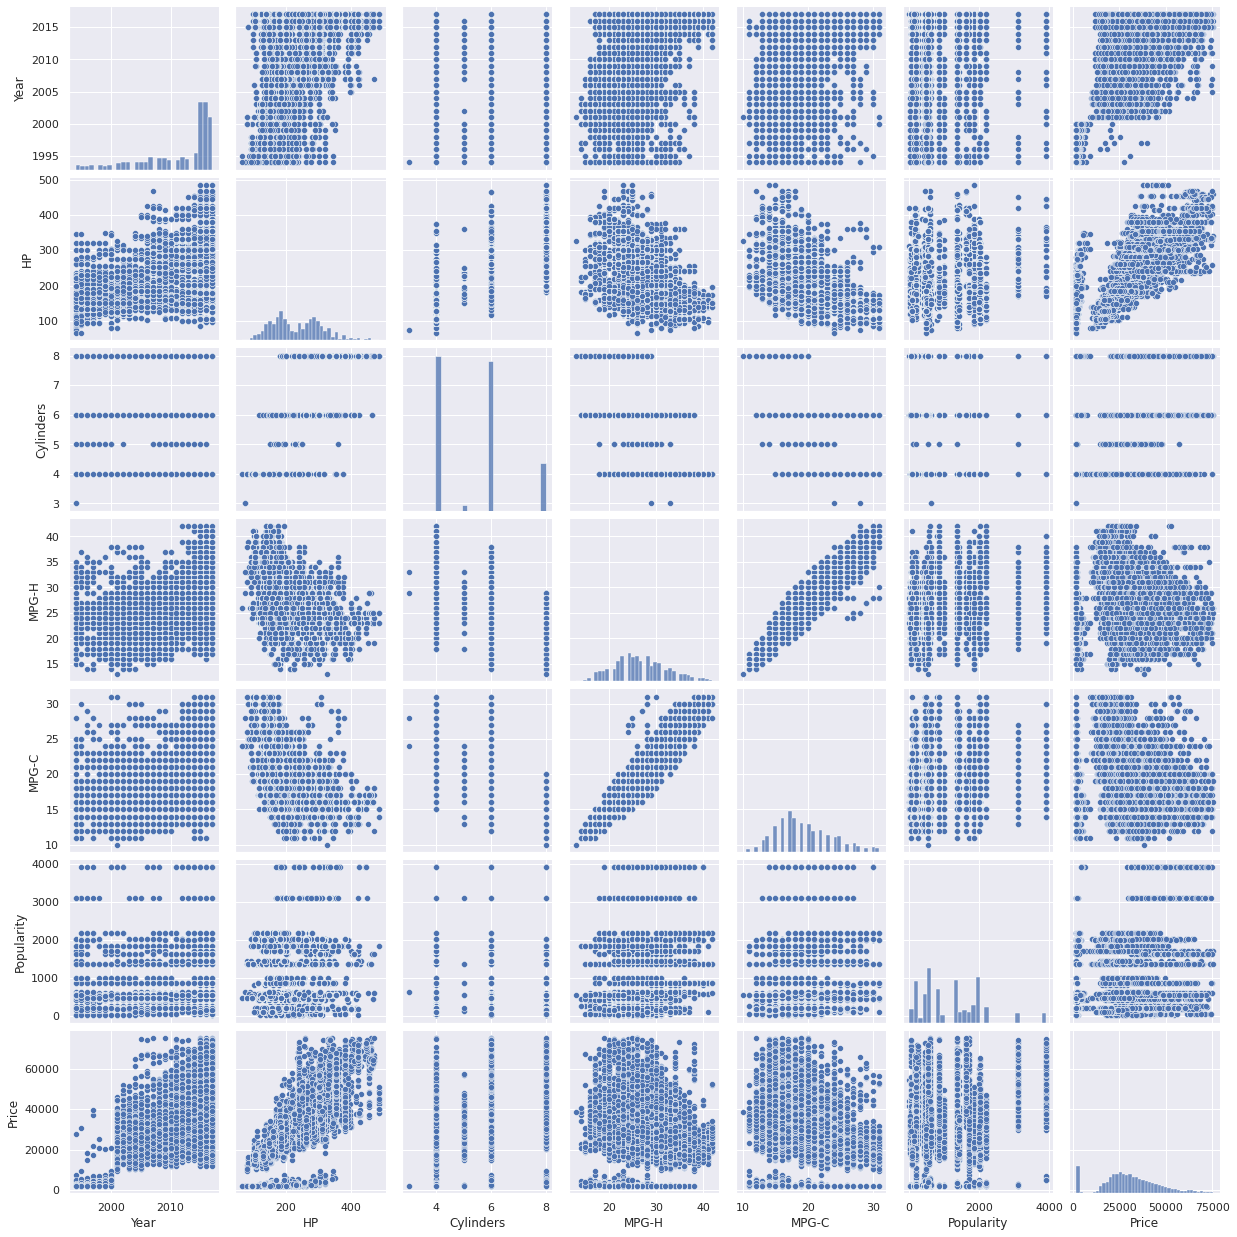

In [ ]:
sns.pairplot(df)

In this graph, we observe the total number of cars owned by each make. And we can conclude that the car brand with the highest number in the dataset is Chevrolet. The car brand with the fewest numbers is Genesis.

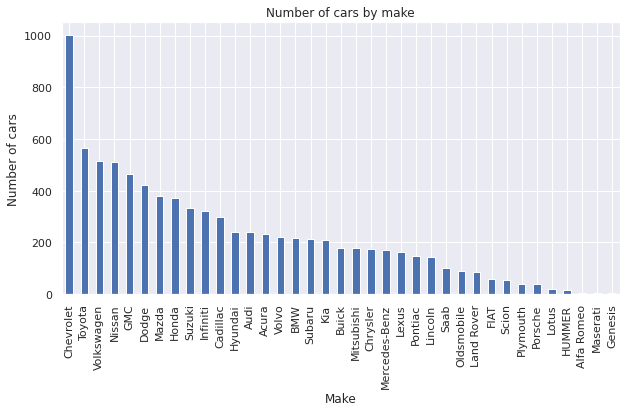

In [ ]:
df.Make.value_counts().plot(kind='bar', figsize=(10,5))
plt.title("Number of cars by make")
plt.ylabel('Number of cars')
plt.xlabel('Make');

In this chart, we can observe the price averages of vehicle brands. The brand with the highest average vehicle price is Maserati. The brand with the lowest price average is Plymouth.

From these two graphs, we can deduce that. The Maserati brand is a luxury brand that makes custom-made vehicles. Plymouth, on the other hand, is a brand that produces little, although its price is low. So it is not very preferable. Chevrolet, which produces the most, is included in the average vehicle price scale in terms of price.

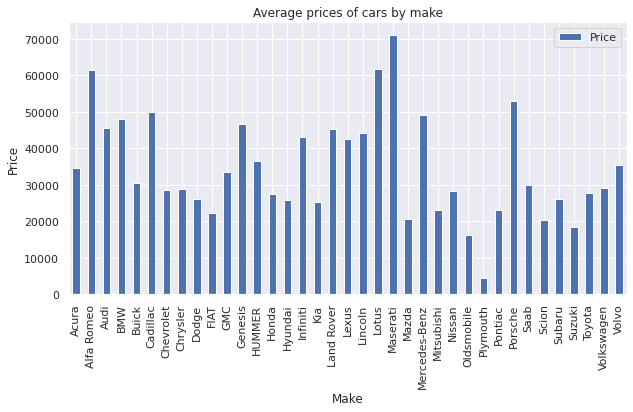

In [ ]:
df.pivot_table('Price', index='Make', aggfunc='mean').plot(kind='bar', figsize=(10,5))
plt.title("Average prices of cars by make")
plt.ylabel('Price')
plt.xlabel('Make');

In the next graph, we observe the average horsepower that brands have. The cars with the highest horsepower on this chart, such as Genesis, Maserati, Cadillac and Porsche, fall into the luxury vehicle class. Horsepower is higher in these brands than in other brands, as it is produced in sports cars.

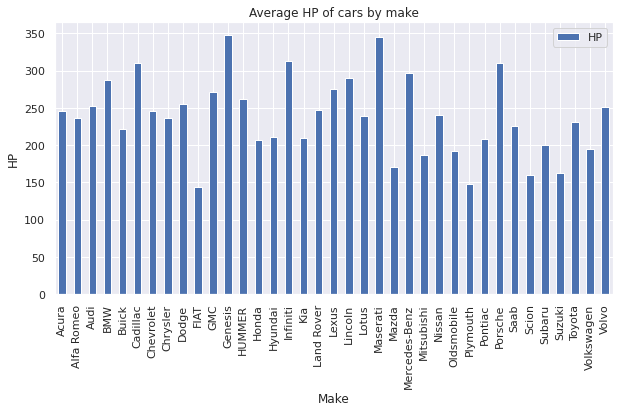

In [ ]:
df.pivot_table('HP', index='Make', aggfunc='mean').plot(kind='bar', figsize=(10,5))
plt.title("Average HP of cars by make")
plt.ylabel('HP')
plt.xlabel('Make');

Here, we observe the price changes of brands over decades. As it can be understood from here, a great change in prices is observed from 1990 to 2000s. In other words, an economic revolution may have taken place between these years. For this reason, there has been a sudden increase in vehicle prices.

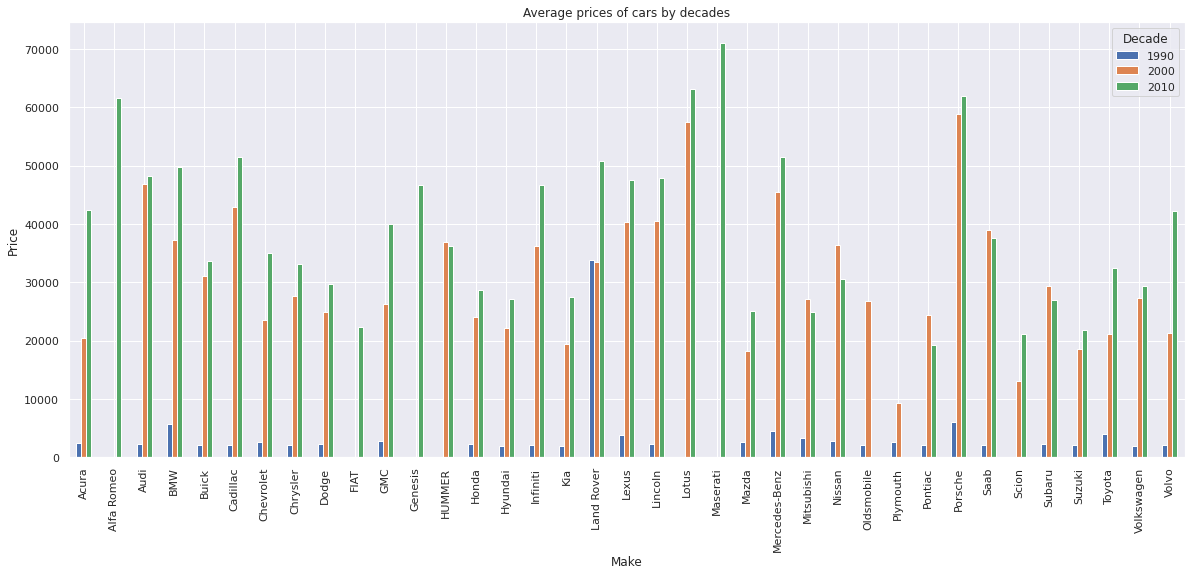

In [ ]:
df['Decade'] = 10 * (df['Year'] // 10)
df.pivot_table('Price', index='Make', columns='Decade', aggfunc='mean').plot(kind='bar', figsize=(20,8))
plt.title("Average prices of cars by decades")
plt.ylabel('Price')
plt.xlabel('Make');

In this chart, we can observe the effect of gear type on vehicle prices. This may vary according to the taste of the customer according to each brand. In general terms, it is seen that the prices of automatic transmission vehicles are higher in most brands. In other words, this shows that automatic transmission vehicles are more preferred. However, there are some exceptional cases. For example, the average price of manual vehicles in the Cadillac brand is higher. In other words, manual gear are preferred more in this brand.

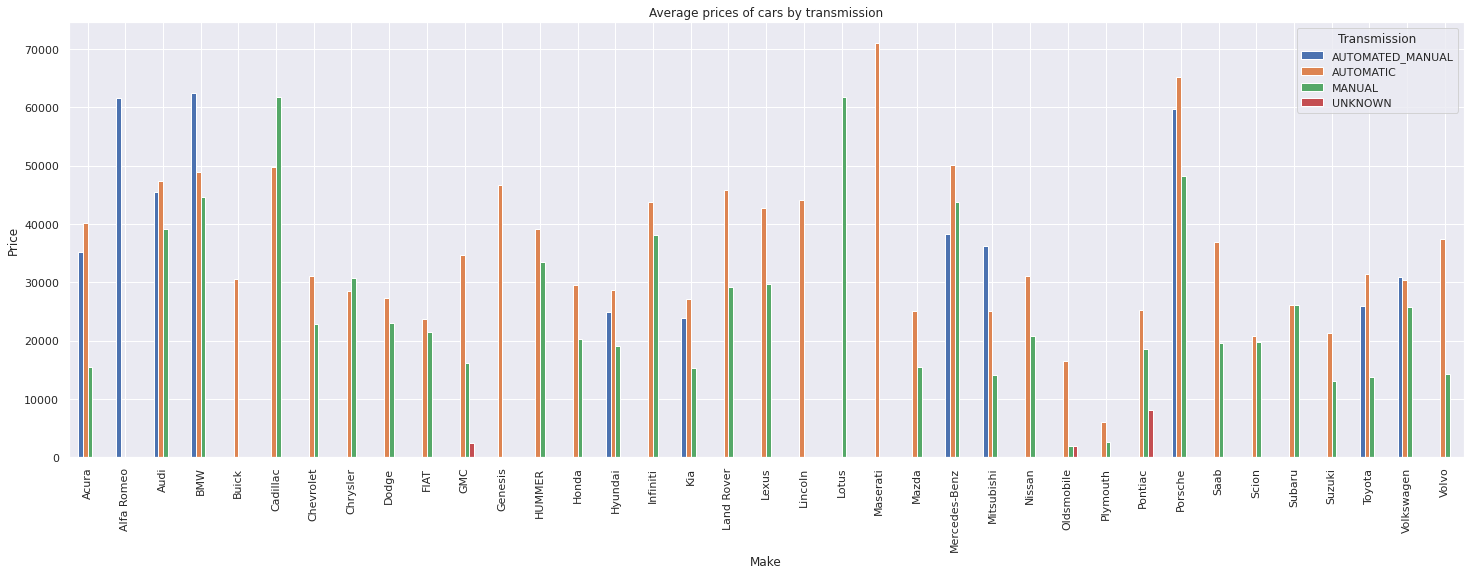

In [ ]:
df.pivot_table('Price', index='Make', columns='Transmission', aggfunc='mean').plot(kind='bar', figsize=(25,8))
plt.title("Average prices of cars by transmission")
plt.ylabel('Price')
plt.xlabel('Make');

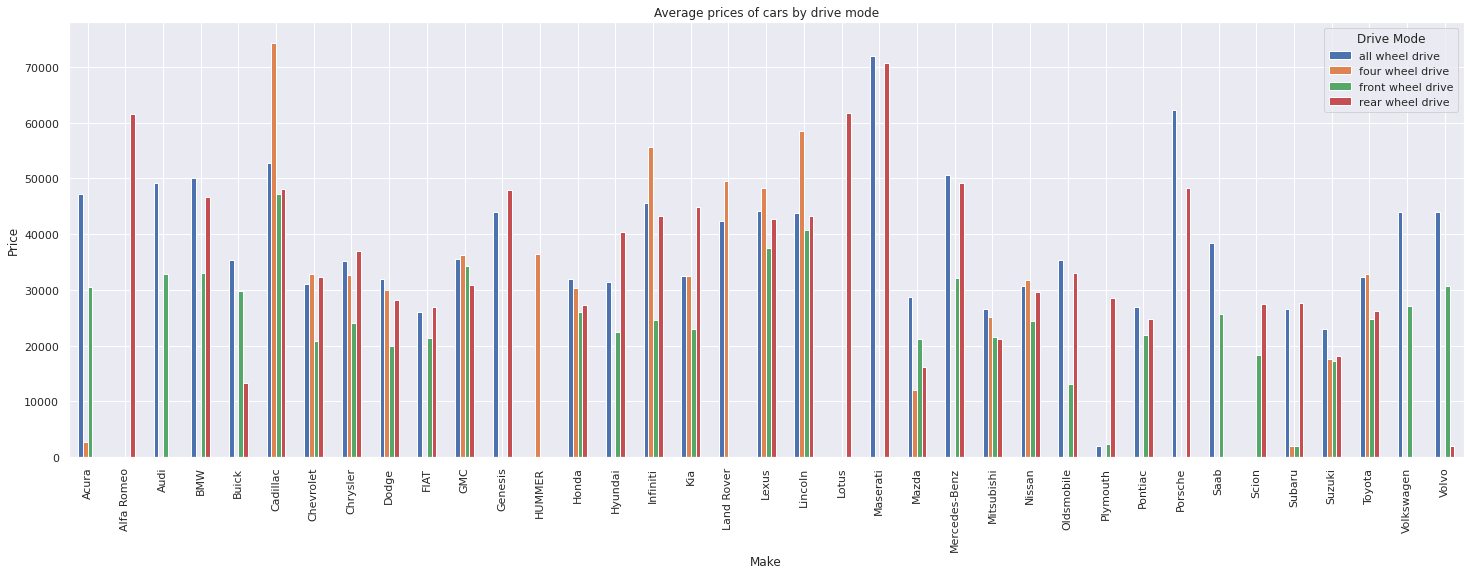

In [ ]:
df.pivot_table('Price', index='Make', columns='Drive Mode', aggfunc='mean').plot(kind='bar', figsize=(25,8))
plt.title("Average prices of cars by drive mode")
plt.ylabel('Price')
plt.xlabel('Make');

In this section, we observe the types of gears used in vehicles over the years. While the use of manual transmission was more common in 1990, the use of automatic transmission was less. But when it comes to the 2000s and 2010s, it is observed that the automatic transmission has become widespread to a large extent. At the same time, it can be said that both automatic and manual transmission vehicles have just started to be used in the 2010s.

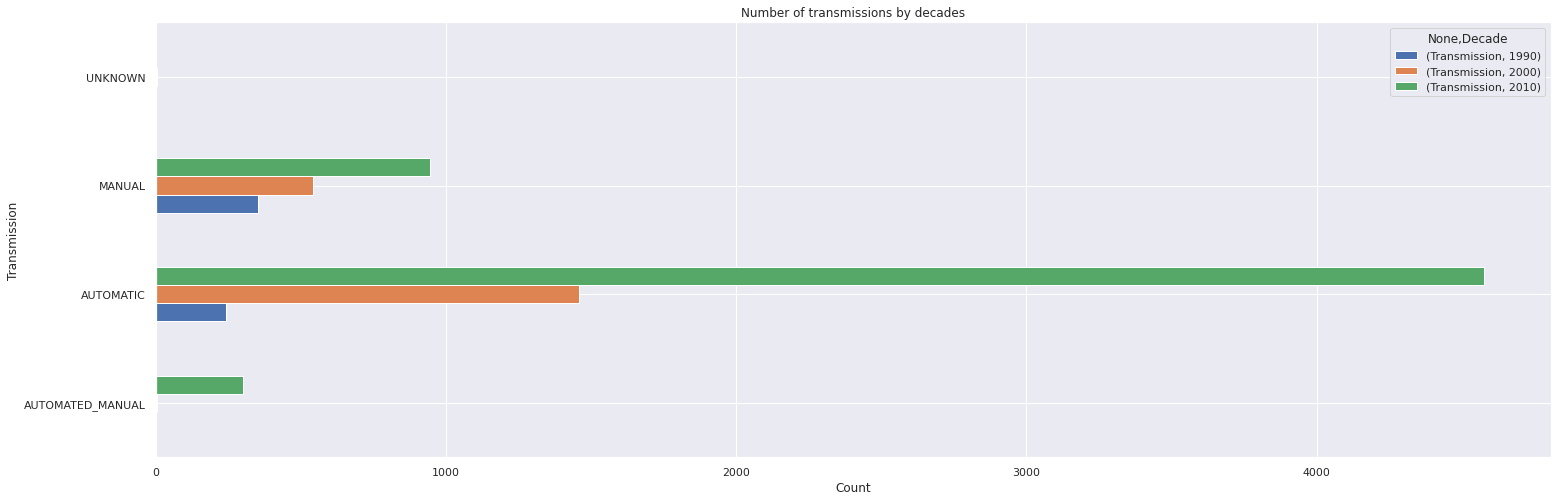

In [ ]:
df.pivot_table(index='Transmission', columns='Decade', aggfunc={'Transmission': 'count'}).plot(kind='barh', figsize=(25,8))
plt.title("Number of transmissions by decades")
plt.xlabel('Count')
plt.ylabel('Transmission');

When we observe the drive modes in the same way by years, it is observed that the biggest increase from year to year is in front wheel drive technology. It can be said that the rate of use of the four wheel drive has decreased over the years compared to other drive models.

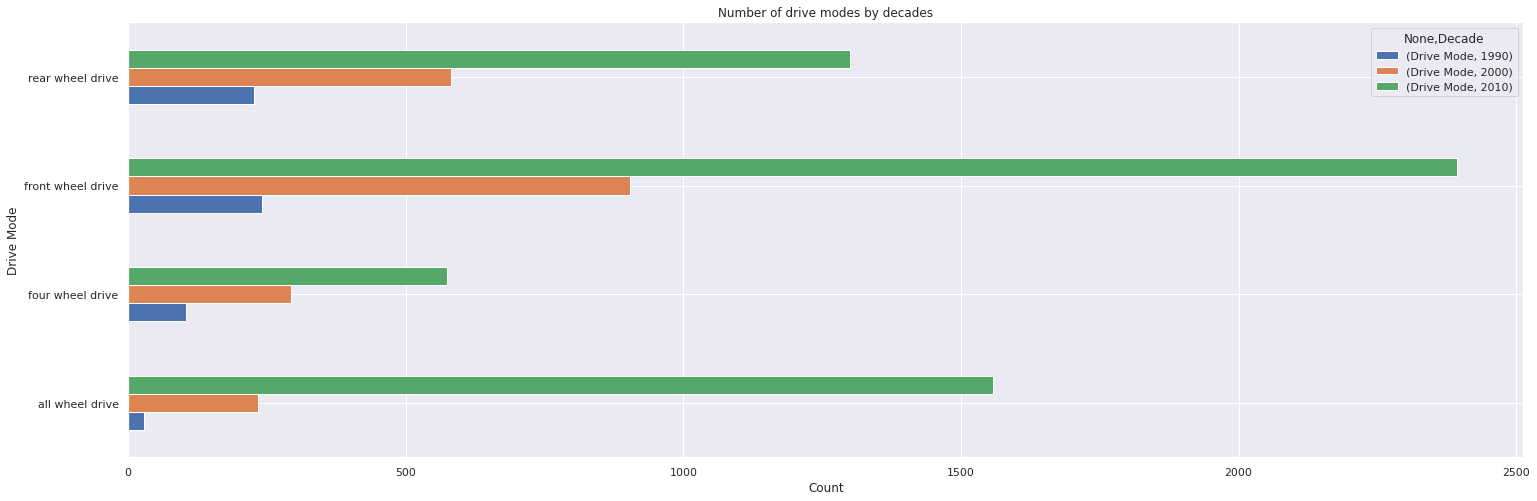

In [ ]:
df.pivot_table(index='Drive Mode', columns='Decade', aggfunc={'Drive Mode': 'count'}).plot(kind='barh', figsize=(25,8))
plt.title("Number of drive modes by decades")
plt.xlabel('Count')
plt.ylabel('Drive Mode');

Year        HP  Cylinders  ...  Popularity     Price    Decade
Year        1.000000  0.314687  -0.114560  ...    0.194792  0.577544  0.939805
HP          0.314687  1.000000   0.736268  ...    0.092237  0.744946  0.279132
Cylinders  -0.114560  0.736268   1.000000  ...    0.012965  0.390584 -0.124311
MPG-H       0.379871 -0.454730  -0.692258  ...    0.092447 -0.123900  0.369363
MPG-C       0.339894 -0.557035  -0.747238  ...    0.079140 -0.201820  0.332676
Popularity  0.194792  0.092237   0.012965  ...    1.000000  0.108194  0.157393
Price       0.577544  0.744946   0.390584  ...    0.108194  1.000000  0.566598
Decade      0.939805  0.279132  -0.124311  ...    0.157393  0.566598  1.000000

[8 rows x 8 columns]

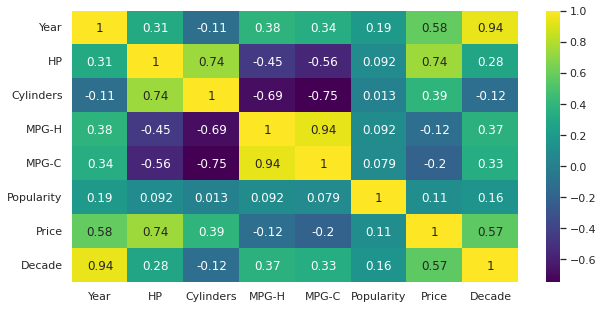

In [ ]:
plt.figure(figsize=(10,5))
c= df.corr()
sns.heatmap(c,cmap="viridis",annot=True)
c

In [ ]:
df_pivot = df.pivot_table('Popularity', index='Make', aggfunc='mean')

In [ ]:
df_pivot = df_pivot.sort_values(by='Popularity')

In [ ]:
new = df_pivot.tail(10)

In [ ]:
new

Popularity
Make                
Hyundai         1439
Cadillac        1624
Porsche         1715
Kia             1720
Dodge           1851
Nissan          2009
Toyota          2031
Honda           2202
Audi            3105
BMW             3916

I listed the top 10 popular car brands by looking at the average popularity in the pie chart. Although BMW is slightly above the middle segment price range in terms of price, it has been determined as one of the most popular brands. In terms of quality, we can deduce that BMW is of better quality than other mid-segment vehicles. Audi, Honda and Toyota brands that follow it are the vehicles in the middle segment of the price range.

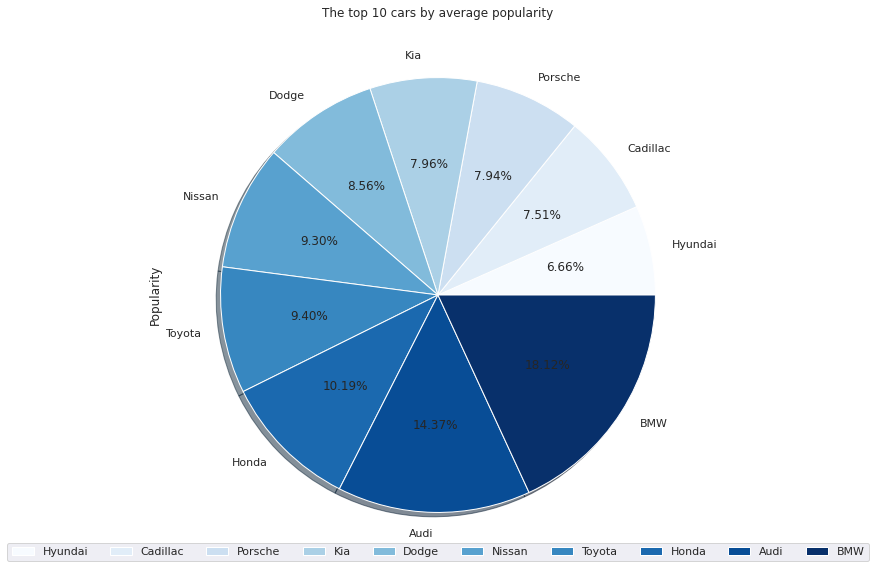

In [ ]:
new.plot(kind='pie', figsize=(15,10), autopct = '%1.2f%%',
                            shadow=True, cmap='Blues', subplots=True)
plt.legend(loc= 'lower center',ncol = 10)
plt.title("The top 10 cars by average popularity");

In this section, we take a look at the relationship between MPG-C and MPG-H. The MPG-H is how quickly it can accelerate, the MPG-C is how quickly it can slow down. Both of these are linear because due to the nature of the car, fast accelerating can slow down fast.

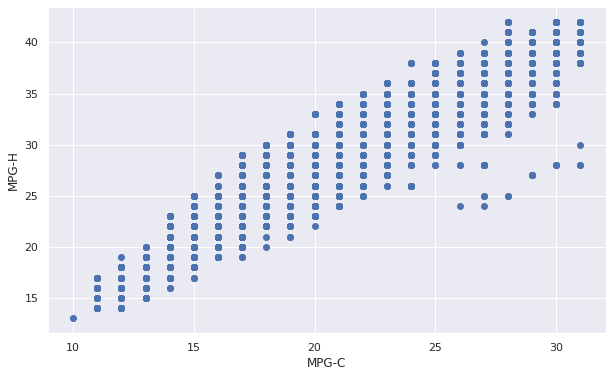

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df['MPG-C'], df['MPG-H'])
ax.set_xlabel('MPG-C')
ax.set_ylabel('MPG-H')
plt.show()

If we look at the distributions of both here, they both show positive skew and similar normal distribution.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


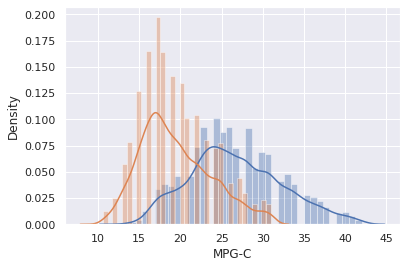

In [ ]:
sns.distplot(df['MPG-H'])
sns.distplot(df['MPG-C'])
plt.show()

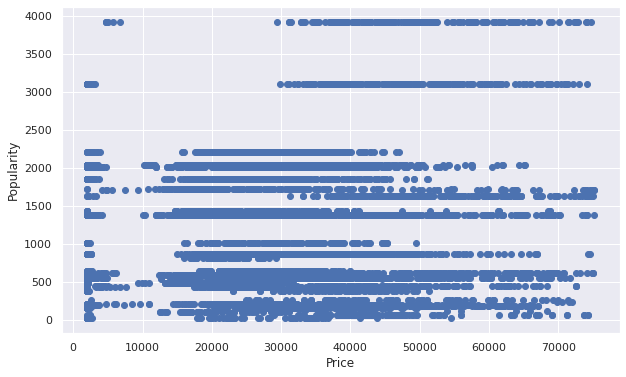

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df['Price'], df['Popularity'])
ax.set_xlabel('Price')
ax.set_ylabel('Popularity')
plt.show()

If we look at the distribution chart of the price, we observe a concentration of around 5000 values, and we observed these prices in the 1990s. Then, in the pricing after 10000, we observe a smooth distribution, and this was the prices corresponding to the years 2000 and 2010.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


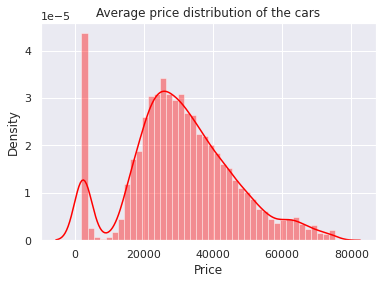

In [ ]:
sns.distplot(df['Price'], color="red")
plt.title('Average price distribution of the cars')
plt.show();

In this part, if we look at the effect of gear on vehicle popularity, we can say that automatic and manual have more impact in general. But it is more correct to say that there is not much difference between them in general terms.

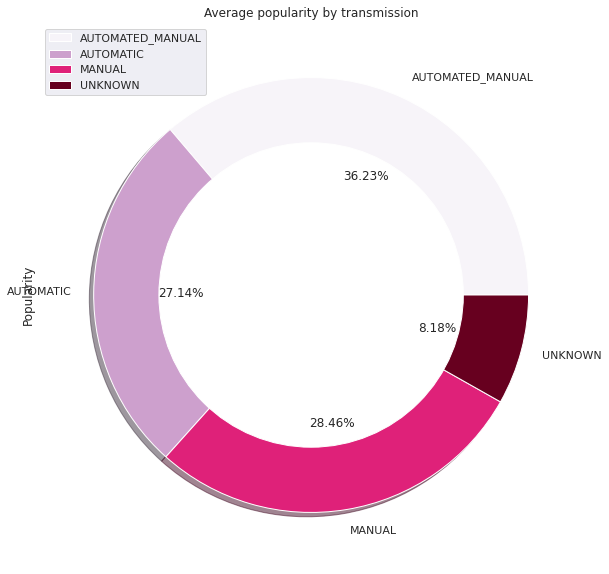

In [ ]:
df.pivot_table('Popularity', index='Transmission', aggfunc='mean').plot(kind='pie', figsize=(15,10), autopct = '%1.2f%%', 
                            shadow=True, cmap='PuRd', subplots=True)

centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.legend(loc='upper left')
plt.title('Average popularity by transmission');

Here, when we want to look at the effects of gear on vehicle price, we can say that manual vehicles have little effect on price, but automatic and both manual and automatic vehicles have more effect on pricing compared to manual vehicles.

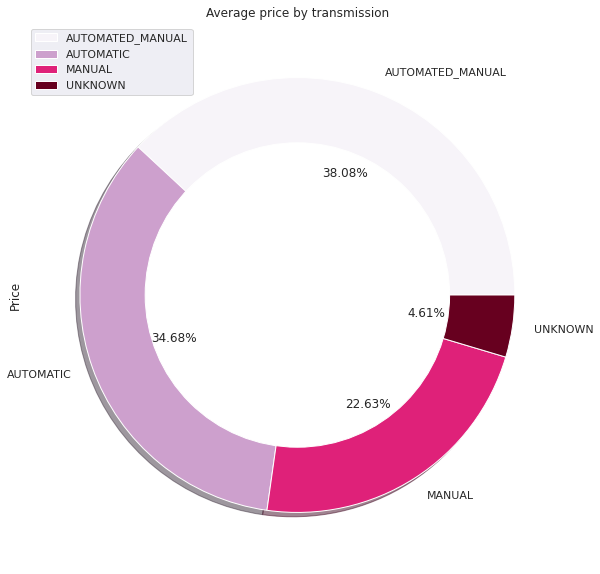

In [ ]:
df.pivot_table('Price', index='Transmission', aggfunc='mean').plot(kind='pie', figsize=(15,10), autopct = '%1.2f%%', 
                            shadow=True, cmap='PuRd', subplots=True)

centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.legend(loc='upper left')
plt.title('Average price by transmission');

If we look at the effect of vehicle cylinders on popularity, we can observe that 4.0, 6.0, 8.0 cylinders are more effective at the same rate. When I looked on the internet, I learned that the 4.0, 6.0 or 8.0 cylinders are generally preferred in vehicles.

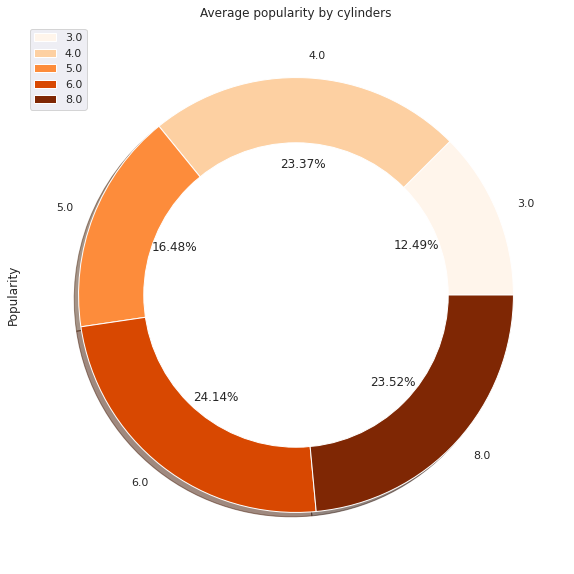

In [ ]:
df.pivot_table('Popularity', index='Cylinders', aggfunc='mean').plot(kind='pie', figsize=(15,10), autopct = '%1.2f%%', 
                            shadow=True, cmap='Oranges', subplots=True)

centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.legend(loc='upper left')
plt.title('Average popularity by cylinders');

When I observe the price effect of the cylinders, we observe that the 8.0 cylinders and 6.0 cylinders have a greater effect on the price. But we can say that the 3.0 cylinder has almost no effect on the price.

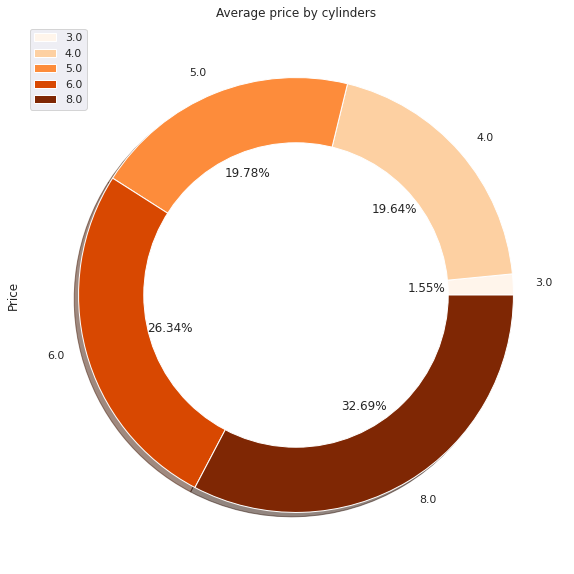

In [ ]:
df.pivot_table('Price', index='Cylinders', aggfunc='mean').plot(kind='pie', figsize=(15,10), autopct = '%1.2f%%', 
                            shadow=True, cmap='Oranges', subplots=True)

centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.legend(loc='upper left')
plt.title('Average price by cylinders');

If we look at the effect of drive mode on popularity in this graph, it would be correct to say that it has almost no effect. All are evenly distributed.

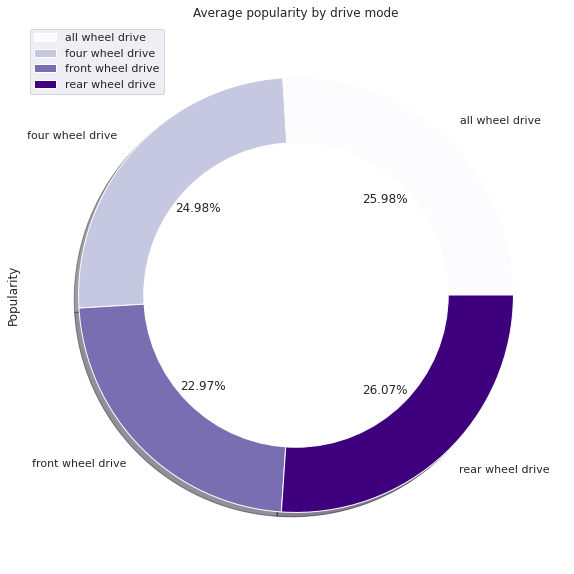

In [ ]:
df.pivot_table('Popularity', index='Drive Mode', aggfunc='mean').plot(kind='pie', figsize=(15,10), autopct = '%1.2f%%', 
                            shadow=True, cmap='Purples', subplots=True)

centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.legend(loc='upper left')
plt.title('Average popularity by drive mode');

It can be said that the effect of the drive mode on the price is not very big, and there are small differences.

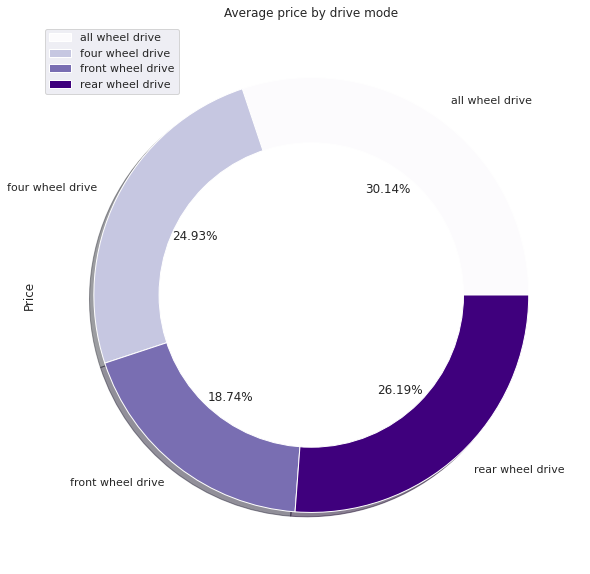

In [ ]:
df.pivot_table('Price', index='Drive Mode', aggfunc='mean').plot(kind='pie', figsize=(15,10), autopct = '%1.2f%%', 
                            shadow=True, cmap='Purples', subplots=True)

centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.legend(loc='upper left')
plt.title('Average price by drive mode');

Here, I observed the distributions on horsepower and price on the scatter plot. As can be seen from this graph, it would be fair to say that in the 1990s, the effect of horsepower on the price was almost nonexistent. But in the 2000s and 2010s, this situation changes. It is observed that the increase in horsepower increases in direct proportion to the increase in prices.

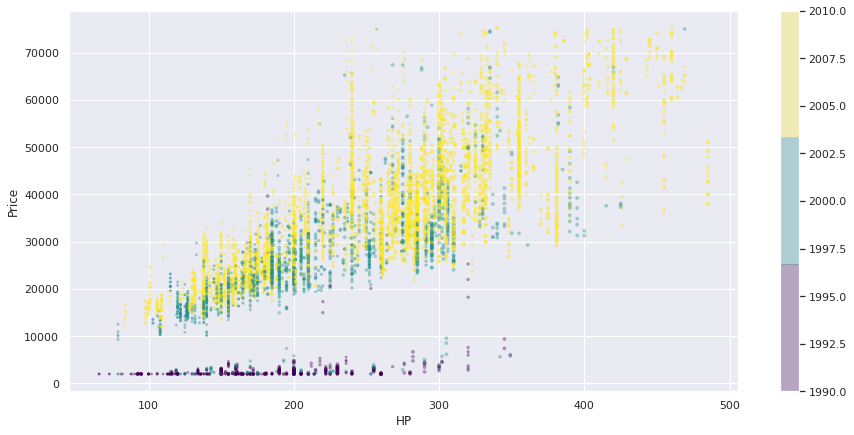

In [ ]:
fig = plt.figure(figsize=(15,7))
plt.scatter(df['HP'], df['Price'], c=df.Decade, s= df.Cylinders, alpha=0.3,
            cmap=plt.cm.get_cmap('viridis', 3))
plt.xlabel('HP')
plt.ylabel('Price')
plt.colorbar(); 

Likewise, in this graph, we observe the relationship between horsepower and price. From here, we can say that the concentration has increased in the 150-200 horsepower range and in the 19000-25000 price range, that is, there are more vehicles with these rates.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


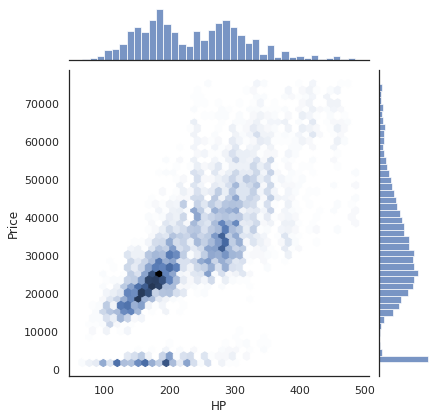

In [ ]:
with sns.axes_style('white'):
    sns.jointplot("HP", "Price", df, kind='hex');

##Task-B

TASK-26B: Please make use at least one of the new functions in V7 for the car dataset as you work in task-26A. 

In [ ]:
! pip install altair_data_server

In [ ]:
import altair as alt
alt.data_transformers.enable('data_server')

alt.Chart(df).mark_point().encode(
    x='HP',
    y='Price',
    color='Transmission',
).interactive()

alt.Chart(...)

In [ ]:
alt.Chart(df).mark_point().encode(
    x='Popularity',
    y='Price',
    color='Decade',
).interactive()

alt.Chart(...)

##Task-C

TASK-26C: Please provide a very short video (of 3 minutes at most) for the findings you have for the parts 26A and 26B.

https://www.loom.com/share/9373b298771d4174aa24645edfa52587